In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
import seaborn as sns

# Load the data
df = pd.read_csv('final_merged_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30324784 entries, 0 to 30324783
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   encore_patient_id               int64  
 1   merged_regimen_id               int64  
 2   intent_of_treatment             object 
 3   date_decision_to_treat          object 
 4   start_date_of_regimen           object 
 5   mapped_regimen                  object 
 6   clinical_trial                  object 
 7   chemo_radiation                 object 
 8   benchmark_group                 object 
 9   link_number                     int64  
 10  merged_cycle_id                 int64  
 11  cycle_number                    int64  
 12  start_date_of_cycle             object 
 13  opcs_procurement_code           object 
 14  perf_status_start_of_cycle      object 
 15  actual_dose_per_administration  float64
 16  age                             int64  
dtypes: float64(1), int64(6), 

In [52]:
# Display the number of unique values per column
unique_counts = df.nunique()
print(unique_counts)


encore_patient_id                  346795
merged_regimen_id                  748878
intent_of_treatment                    19
date_decision_to_treat               4089
start_date_of_regimen                3499
mapped_regimen                       2246
clinical_trial                         11
chemo_radiation                         7
benchmark_group                      1743
link_number                        346795
merged_cycle_id                   2704839
cycle_number                          225
start_date_of_cycle                  3745
opcs_procurement_code                 118
perf_status_start_of_cycle             25
actual_dose_per_administration       5630
age                                   105
decision_ts                          4089
regimen_ts                           3499
cycle_ts                             3745
perf_status_numeric                    25
regimen_month                         125
age_bin                                10
dtype: int64


In [53]:
# Loop through each column and display sample unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    # Print only the first 10 unique values to avoid overwhelming output
    print(unique_vals[:10])
    print("-" * 40)


Column: encore_patient_id
[10403208 10403217 10403309 10403374 10403485 10403522 10403546 10403662
 10403714 10403749]
----------------------------------------
Column: merged_regimen_id
[10030621 10030622 10030627 10030632 10030637 10030639 10030641 10030653
 10030657 10030659]
----------------------------------------
Column: intent_of_treatment
['P ' 'A ' '03' 'D ' '  ' '9 ' '02' 'C ' 'N ' '01']
----------------------------------------
Column: date_decision_to_treat
<DatetimeArray>
['2020-04-28 00:00:00', '2022-02-04 00:00:00', '2021-12-29 00:00:00',
 '2017-03-31 00:00:00', '2015-06-08 00:00:00', '2017-05-05 00:00:00',
 '2020-06-24 00:00:00', '2008-06-24 00:00:00', '2017-06-17 00:00:00',
 '2020-08-05 00:00:00']
Length: 10, dtype: datetime64[ns]
----------------------------------------
Column: start_date_of_regimen
<DatetimeArray>
['2020-04-28 00:00:00', '2022-02-08 00:00:00', '2022-01-13 00:00:00',
 '2017-03-31 00:00:00', '2015-06-21 00:00:00', '2017-05-07 00:00:00',
 '2020-06-24 00:0

In [3]:
df.head()

encore_patient_id  merged_regimen_id intent_of_treatment  \
0           10403208           10030621                  P    
1           10403208           10030621                  P    
2           10403208           10030621                  P    
3           10403208           10030621                  P    
4           10403208           10030621                  P    

  date_decision_to_treat start_date_of_regimen  \
0             2020-04-28            2020-04-28   
1             2020-04-28            2020-04-28   
2             2020-04-28            2020-04-28   
3             2020-04-28            2020-04-28   
4             2020-04-28            2020-04-28   

                                      mapped_regimen clinical_trial  \
0  Hydroxycarbamide                              ...     02           
1  Hydroxycarbamide                              ...     02           
2  Hydroxycarbamide                              ...     02           
3  Hydroxycarbamide                              ...     02           
4  Hydroxycarbamide                              ...     02           

  chemo_radiation                                    benchmark_group  \
0           N      HYDROXYCARBAMIDE                              ...   
1           N      HYDROXYCARBAMIDE                              ...   
2           N      HYDROXYCARBAMIDE                              ...   
3           N      HYDROXYCARBAMIDE                              ...   
4           N      HYDROXYCARBAMIDE                              ...   

   link_number  merged_cycle_id  cycle_number start_date_of_cycle  \
0    100798414         10000001             1          2020-04-28   
1    100798414         10020870             4          2020-09-30   
2    100798414         10035559            13          2020-10-28   
3    100798414         10035559            13          2020-10-28   
4    100798414         10035559            13          2020-10-28   

  opcs_procurement_code perf_status_start_of_cycle  \
0            X713                                    
1                                            0       
2                                                    
3                                                    
4                                                    

   actual_dose_per_administration  age  
0                           420.0   94  
1                            15.0   94  
2                          1000.0   94  
3                             8.0   94  
4                            10.0   94

In [4]:
df.describe()

encore_patient_id  merged_regimen_id   link_number  merged_cycle_id  \
count       3.032478e+07       3.032478e+07  3.032478e+07     3.032478e+07   
mean        7.095808e+07       7.098089e+07  1.009379e+08     7.103415e+07   
std         4.367948e+07       4.370187e+07  5.399605e+05     4.367459e+07   
min         1.000018e+07       1.003062e+07  1.000000e+08     1.000000e+07   
25%         4.014081e+07       4.019172e+07  1.004723e+08     4.018451e+07   
50%         7.004811e+07       7.008662e+07  1.009370e+08     7.014335e+07   
75%         9.005013e+07       9.005247e+07  1.014059e+08     9.006273e+07   
max         2.500025e+08       2.500094e+08  1.018716e+08     2.500075e+08   

       cycle_number  actual_dose_per_administration           age  
count  3.032478e+07                    3.032478e+07  3.032478e+07  
mean   4.498762e+00                    6.396552e+02  6.572370e+01  
std    6.460032e+00                    4.954384e+03  1.666438e+01  
min    0.000000e+00                   -1.000000e+00  0.000000e+00  
25%    1.000000e+00                    1.000000e+01  5.700000e+01  
50%    3.000000e+00                    1.250000e+02  6.800000e+01  
75%    5.000000e+00                    5.000000e+02  7.700000e+01  
max    3.090000e+02                    5.540250e+06  1.040000e+02

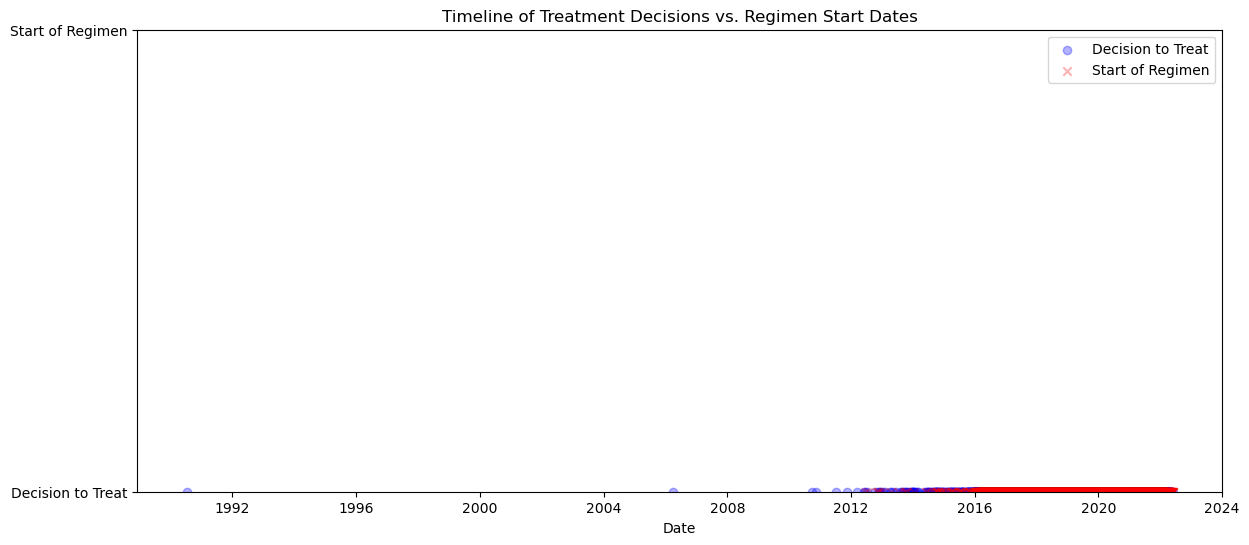

In [30]:
# Plotting the timeline of treatment decisions and regimen start dates.
# We'll create a scatter plot with two different markers for comparison.
plt.figure(figsize=(14,6))
plt.scatter(df_sample['date_decision_to_treat'], np.zeros_like(df_sample['date_decision_to_treat']), 
            alpha=0.3, label='Decision to Treat', marker='o', color='blue')
plt.scatter(df_sample['start_date_of_regimen'], np.ones_like(df_sample['start_date_of_regimen']), 
            alpha=0.3, label='Start of Regimen', marker='x', color='red')
plt.yticks([0,1], ['Decision to Treat', 'Start of Regimen'])
plt.xlabel('Date')
plt.title('Timeline of Treatment Decisions vs. Regimen Start Dates')
plt.legend()
plt.show()

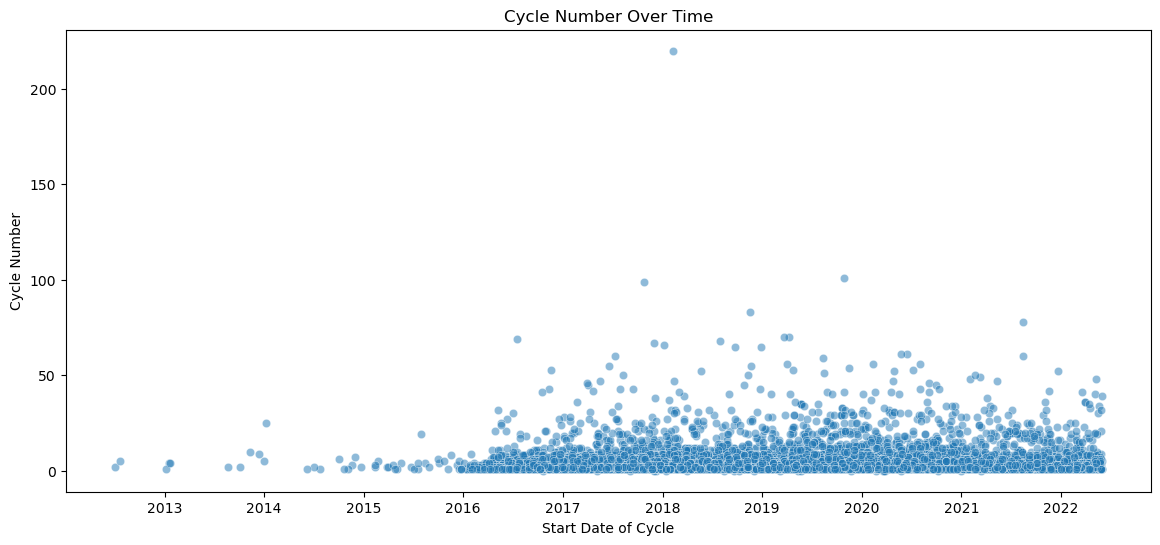

In [31]:
# Scatter plot: cycle_number over start_date_of_cycle
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_sample, x='start_date_of_cycle', y='cycle_number', alpha=0.5)
plt.xlabel('Start Date of Cycle')
plt.ylabel('Cycle Number')
plt.title('Cycle Number Over Time')
plt.show()


C:\Users\Black\AppData\Local\Temp\ipykernel_14604\1272556194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regimen_counts.index, y=regimen_counts.values, palette='viridis')


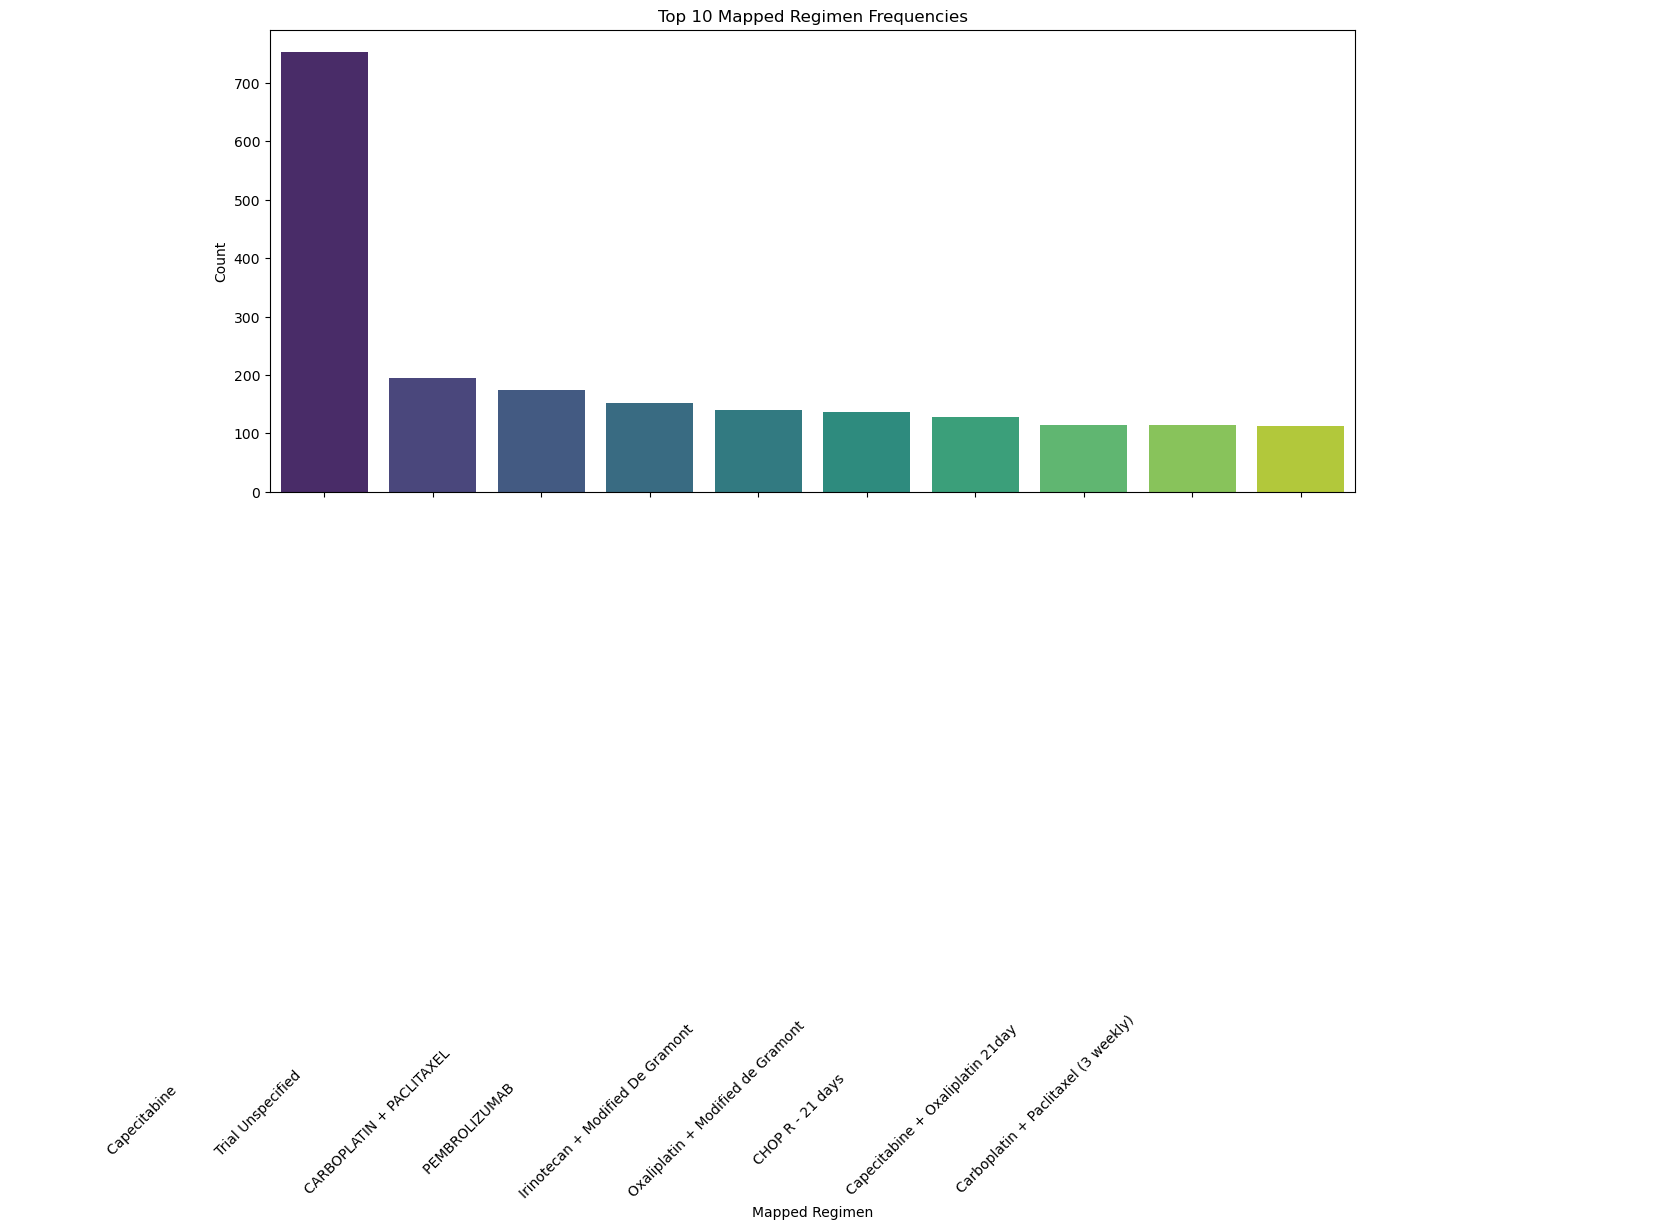

In [32]:
# Bar chart for mapped_regimen frequency distribution
plt.figure(figsize=(14,6))
regimen_counts = df_sample['mapped_regimen'].value_counts().head(10)  # top 10 regimens for clarity
sns.barplot(x=regimen_counts.index, y=regimen_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Mapped Regimen')
plt.ylabel('Count')
plt.title('Top 10 Mapped Regimen Frequencies')
plt.show()


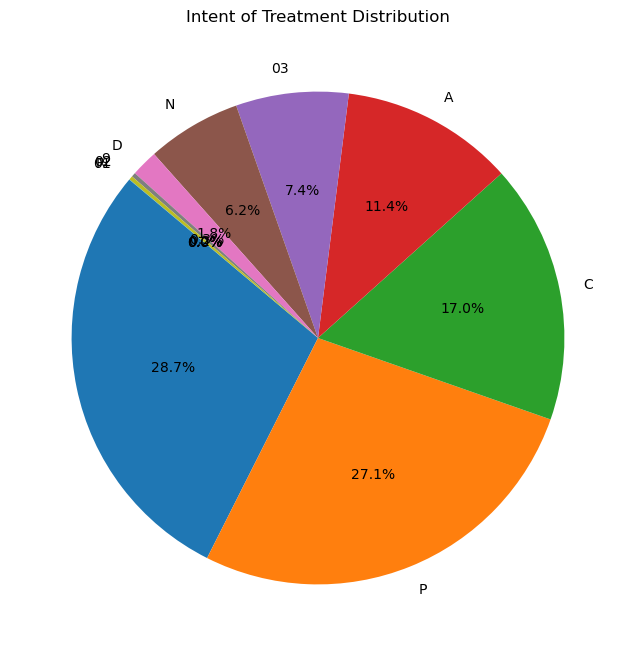

In [33]:
# Pie chart for intent_of_treatment distribution
intent_counts = df_sample['intent_of_treatment'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(intent_counts.values, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Intent of Treatment Distribution')
plt.show()


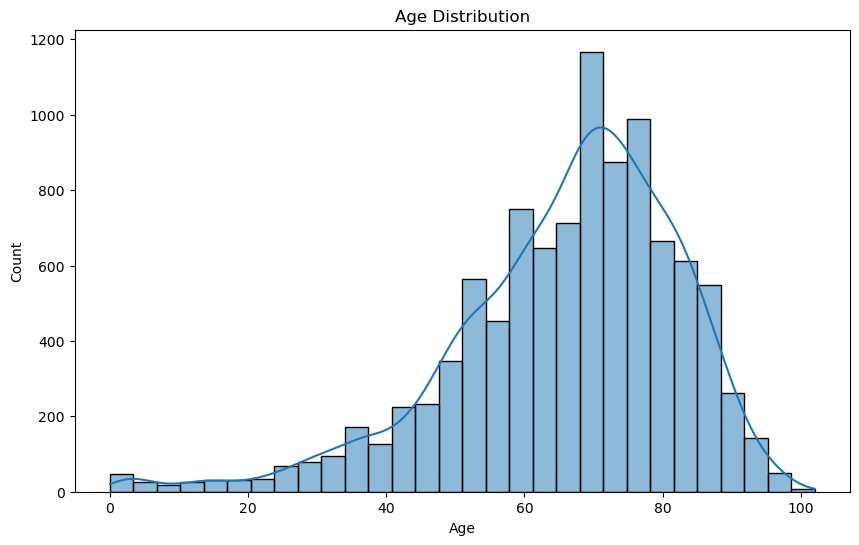

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['age'], bins=30, kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


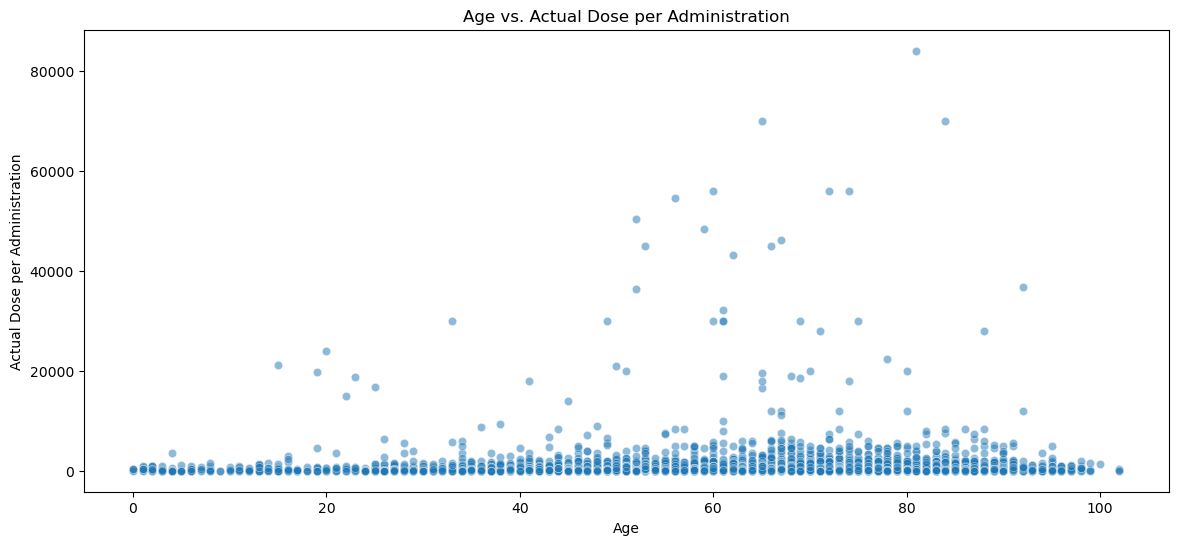

In [36]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_sample, x='age', y='actual_dose_per_administration', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Actual Dose per Administration')
plt.title('Age vs. Actual Dose per Administration')
plt.show()


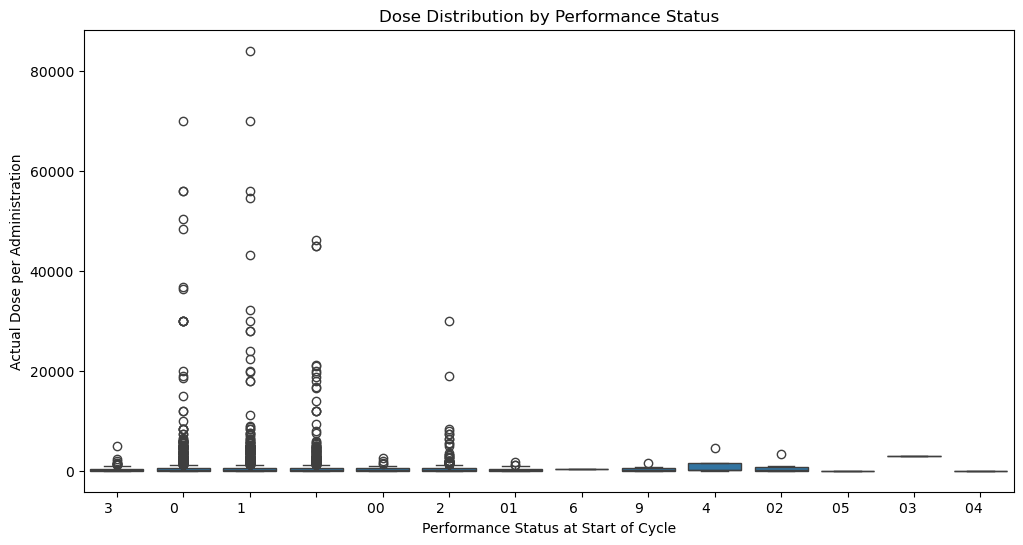

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_sample, x='perf_status_start_of_cycle', y='actual_dose_per_administration')
plt.xlabel('Performance Status at Start of Cycle')
plt.ylabel('Actual Dose per Administration')
plt.title('Dose Distribution by Performance Status')
plt.show()


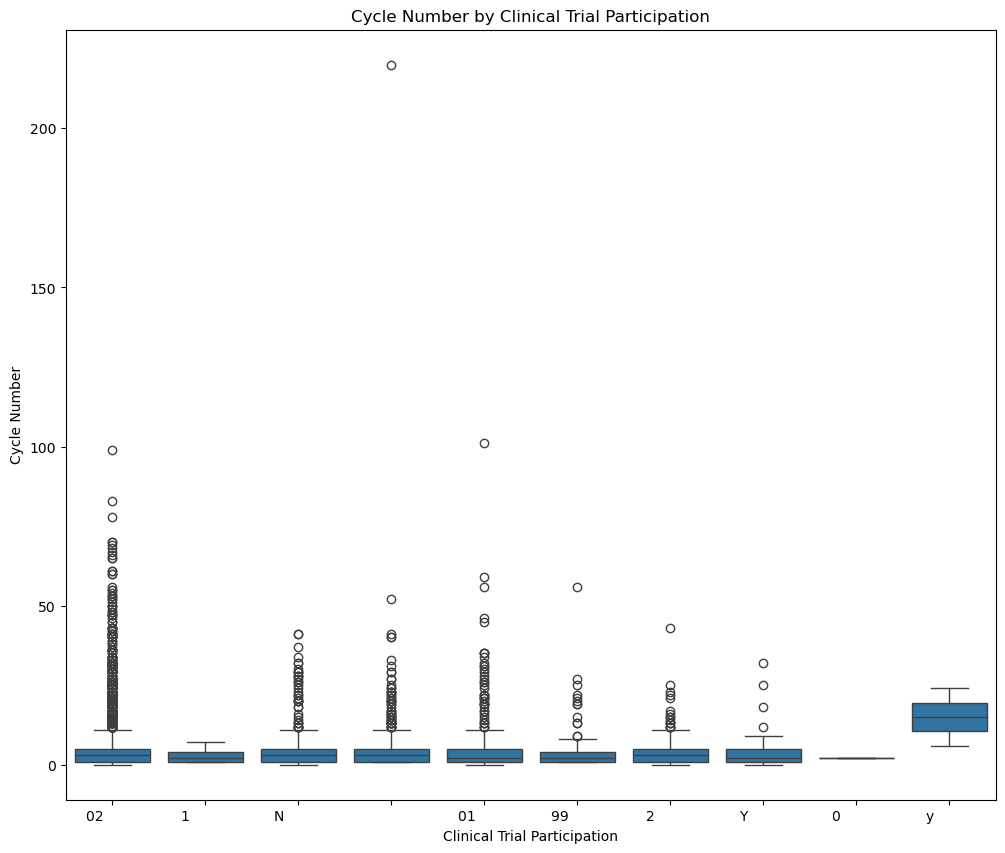

In [49]:
# Comparing cycle numbers for patients in clinical trials vs. non-trial
plt.figure(figsize=(12,10))
sns.boxplot(data=df_sample, x='clinical_trial', y='cycle_number')
plt.xlabel('Clinical Trial Participation')
plt.ylabel('Cycle Number')
plt.title('Cycle Number by Clinical Trial Participation')
plt.show()


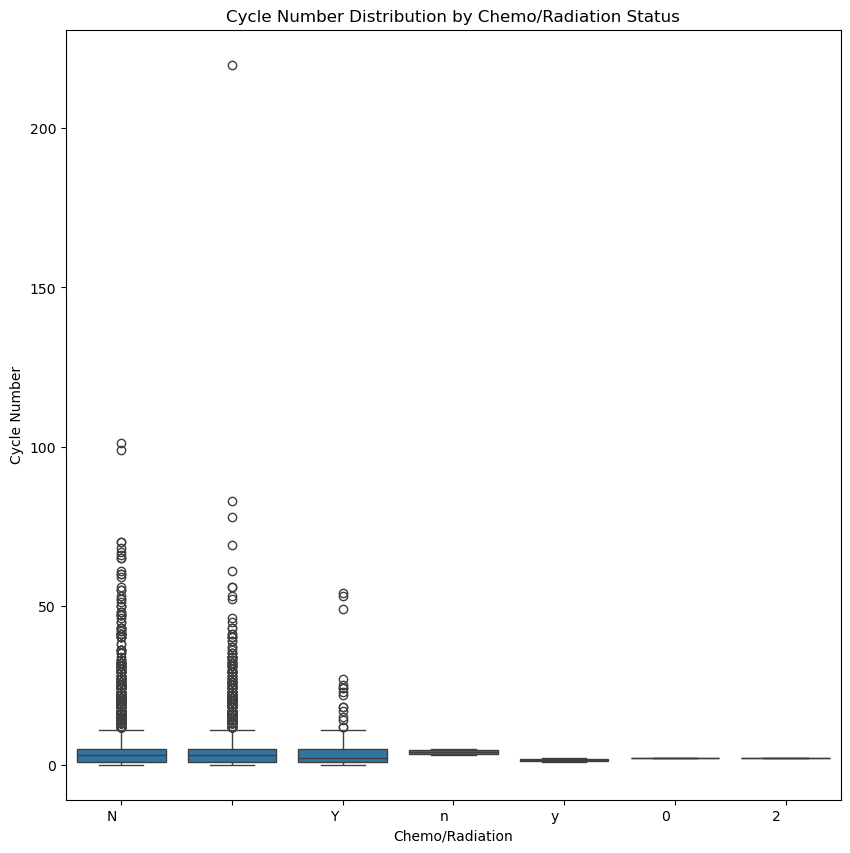

In [48]:
# Boxplot comparing cycle_number by chemo_radiation status
plt.figure(figsize=(10,10))
sns.boxplot(data=df_sample, x='chemo_radiation', y='cycle_number')
plt.xlabel('Chemo/Radiation')
plt.ylabel('Cycle Number')
plt.title('Cycle Number Distribution by Chemo/Radiation Status')
plt.show()


C:\Users\Black\AppData\Local\Temp\ipykernel_14604\1729064423.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_sample.pivot_table(index='age_bin', columns='month', values='cycle_number', aggfunc='mean')


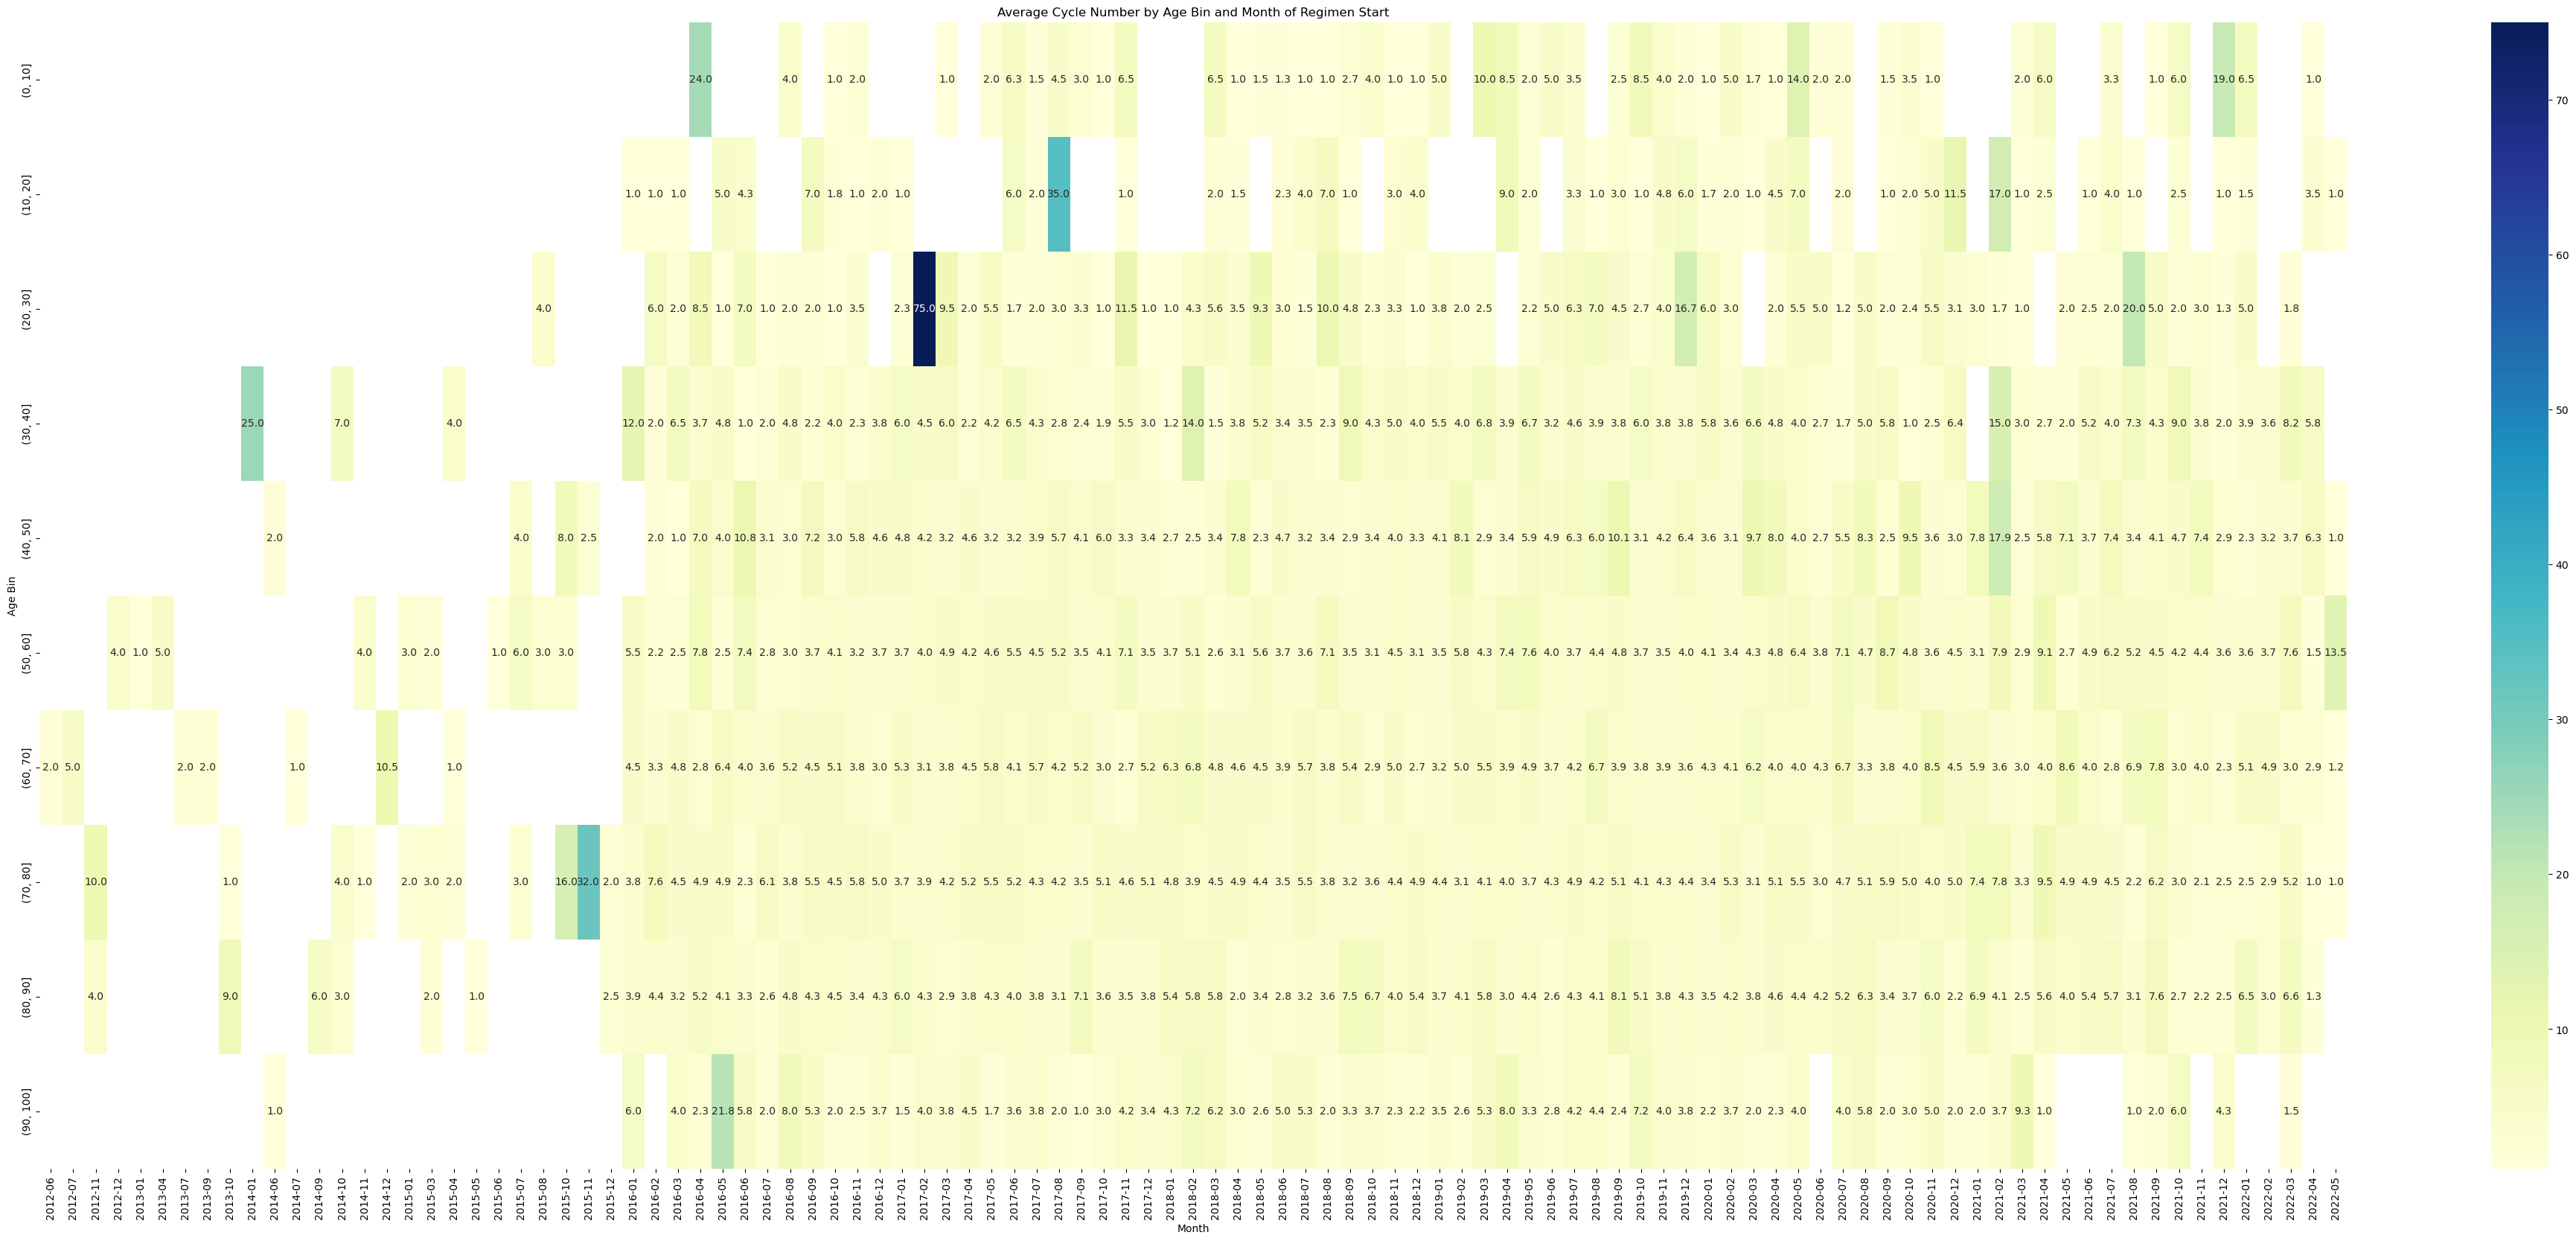

In [46]:
# Create month and age bins
df_sample['month'] = df_sample['start_date_of_regimen'].dt.to_period('M').astype(str)
df_sample['age_bin'] = pd.cut(df_sample['age'], bins=range(0, 101, 10))

# Pivot table: average cycle_number per month and age bin
heatmap_data = df_sample.pivot_table(index='age_bin', columns='month', values='cycle_number', aggfunc='mean')
plt.figure(figsize=(50,20))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Cycle Number by Age Bin and Month of Regimen Start')
plt.xlabel('Month')
plt.ylabel('Age Bin')
plt.show()


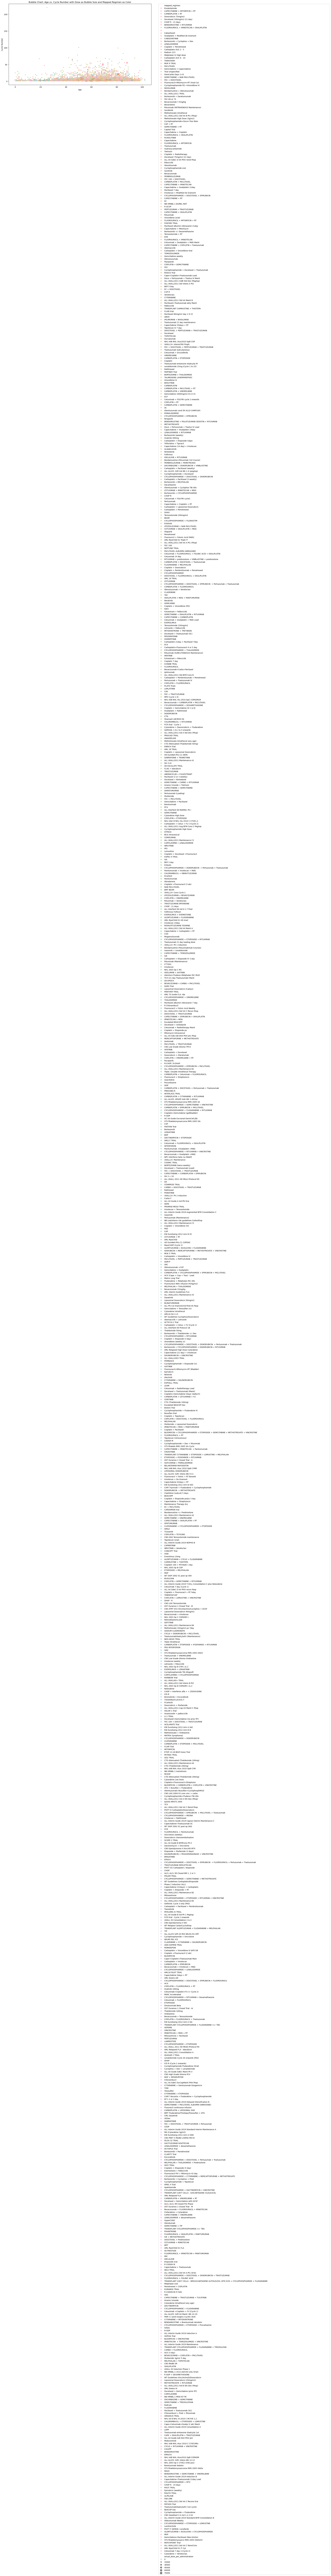

In [41]:
plt.figure(figsize=(14,8))
# To avoid overcrowding, use a sample or aggregated data
subset = df_sample.dropna(subset=['actual_dose_per_administration', 'age', 'cycle_number'])
scatter = sns.scatterplot(data=subset, x='age', y='cycle_number', size='actual_dose_per_administration', 
                          hue='mapped_regimen', alpha=0.6, sizes=(20, 200))
plt.xlabel('Age')
plt.ylabel('Cycle Number')
plt.title('Bubble Chart: Age vs. Cycle Number with Dose as Bubble Size and Mapped Regimen as Color')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


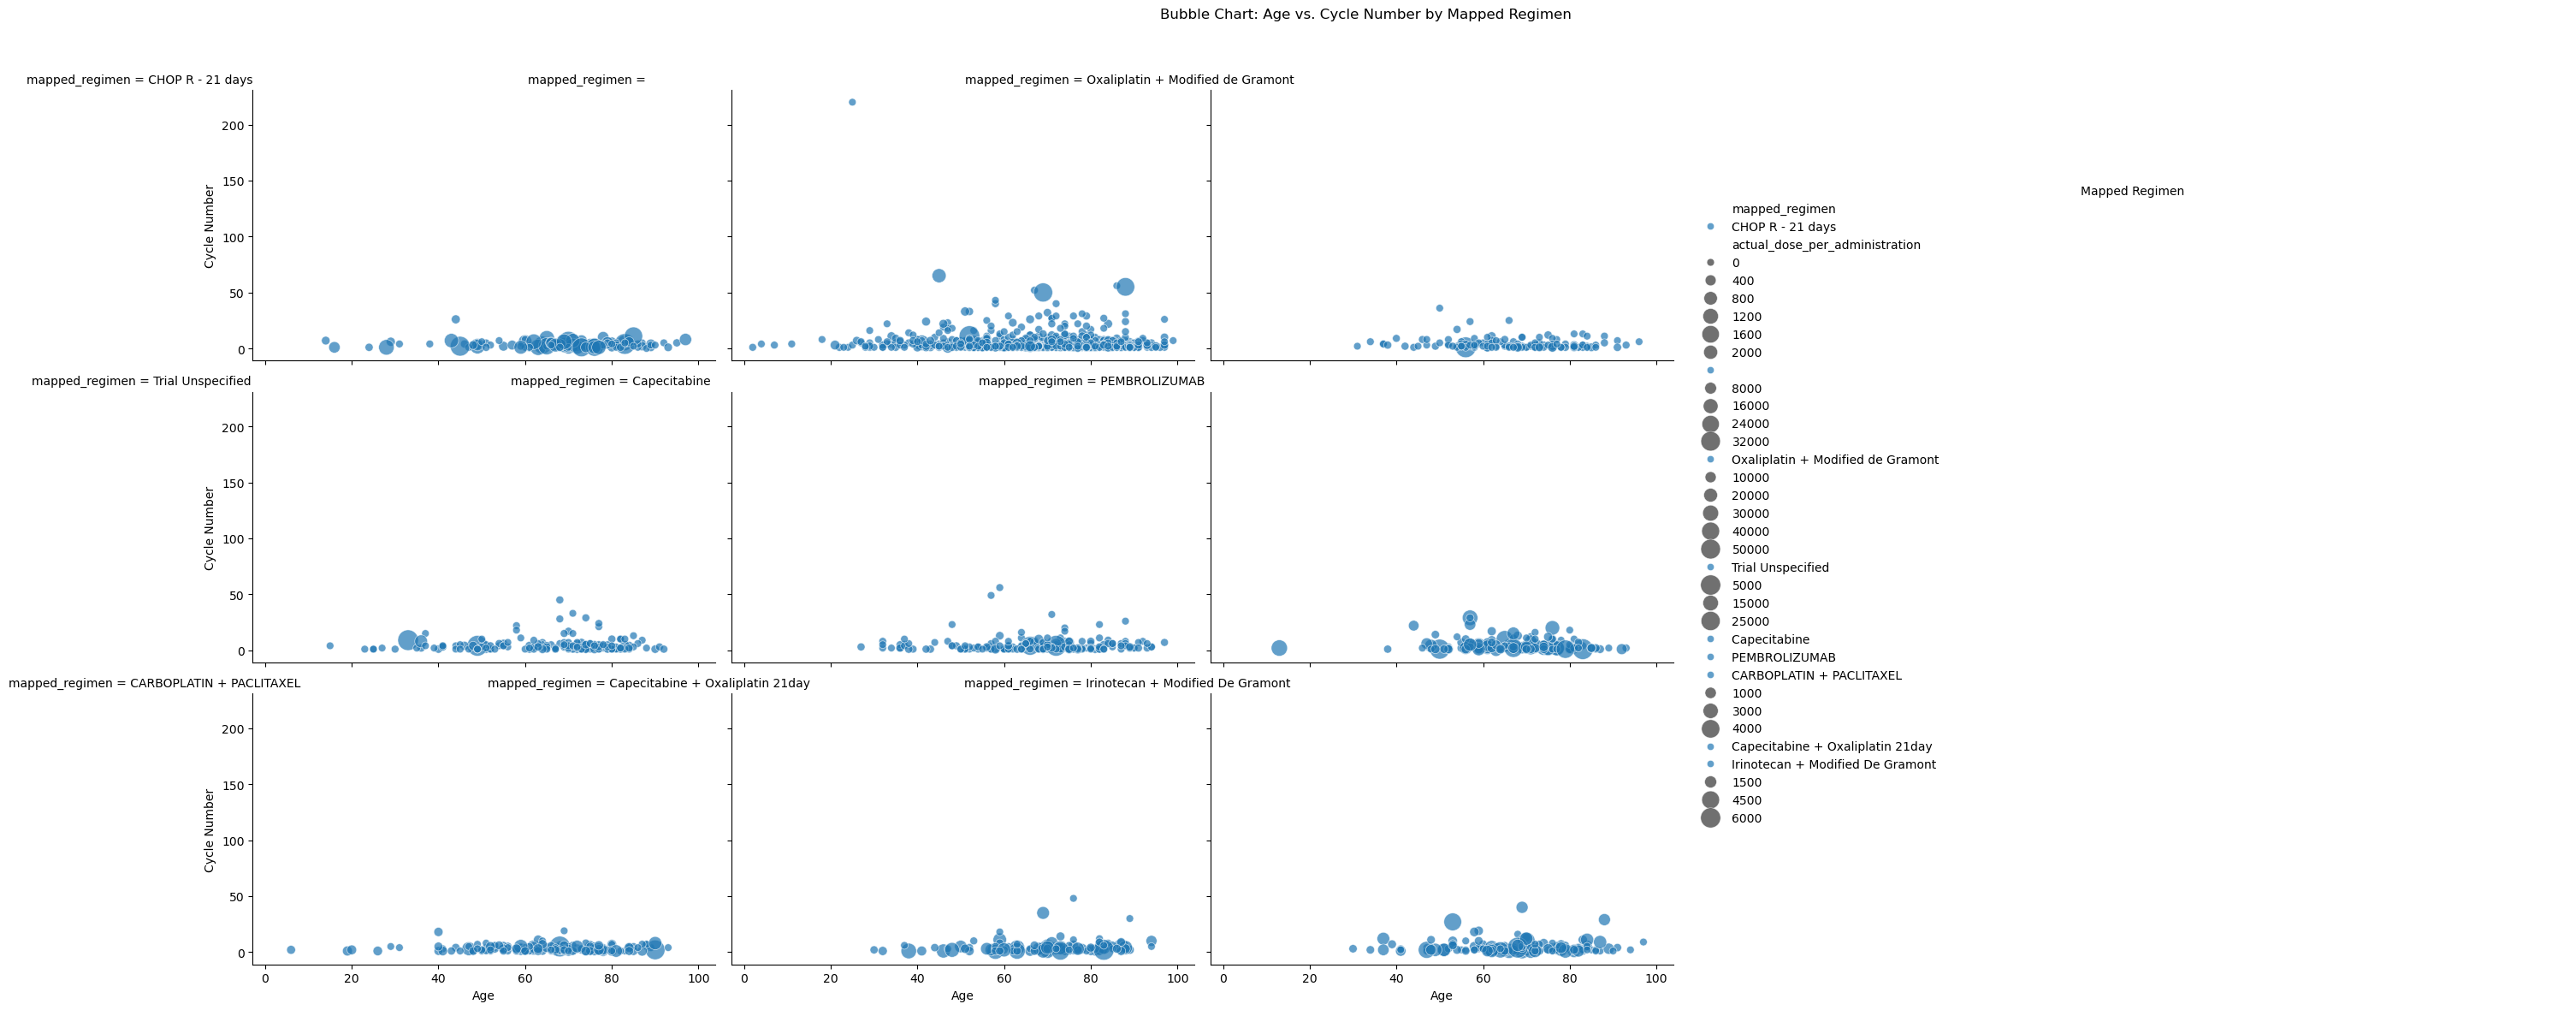

In [50]:
# Use a sample or aggregated data to avoid overcrowding
subset = df_sample.dropna(subset=['actual_dose_per_administration', 'age', 'cycle_number'])

# Optionally, focus on the top N most frequent mapped_regimen values
top_regimens = subset['mapped_regimen'].value_counts().nlargest(9).index.tolist()
subset_top = subset[subset['mapped_regimen'].isin(top_regimens)]

# Create a FacetGrid with 3 columns
g = sns.FacetGrid(subset_top, col="mapped_regimen", col_wrap=3, height=4, aspect=1.5, sharex=True, sharey=True)
g.map_dataframe(
    sns.scatterplot, 
    x="age", 
    y="cycle_number", 
    size="actual_dose_per_administration", 
    hue="mapped_regimen", 
    alpha=0.7, 
    sizes=(40, 300)
)

g.set_axis_labels("Age", "Cycle Number")
g.add_legend(title="Mapped Regimen")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Bubble Chart: Age vs. Cycle Number by Mapped Regimen")

plt.show()